In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("deliveries.csv")

In [8]:
df.tail()

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
260915,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,5,SS Iyer,AK Markram,VR Iyer,1,0,1,NaN,0,NaN,NaN,NaN
260916,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,6,VR Iyer,AK Markram,SS Iyer,1,0,1,NaN,0,NaN,NaN,NaN
260917,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,1,VR Iyer,Shahbaz Ahmed,SS Iyer,1,0,1,NaN,0,NaN,NaN,NaN
260918,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,2,SS Iyer,Shahbaz Ahmed,VR Iyer,1,0,1,NaN,0,NaN,NaN,NaN
260919,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,3,VR Iyer,Shahbaz Ahmed,SS Iyer,1,0,1,NaN,0,NaN,NaN,NaN


In [28]:
def show_summary(df, matchID):
    df = df[df.match_id == matchID]
    df1 = df[df.inning == 1]
    df2 = df[df.inning == 2]
    
    df1.reset_index(inplace = True, drop = True)
    df2.reset_index(inplace = True, drop = True)
    
    df1["cumu_runs"] = 0
    df2["cumu_runs"] = 0
    
    runs_count = 0
    for i in range(len(df1)):
        runs_count += df1["total_runs"][i]
        df1["cumu_runs"][i] = runs_count
     
    runs_count = 0
    for i in range(len(df2)):
        runs_count += df2["total_runs"][i]
        df2["cumu_runs"][i] = runs_count
        
    ball_no_ing1 = [i for i in range(1, len(df1) + 1)]
    ball_no_ing2 = [i for i in range(1, len(df2) + 1)]  
    
    wk_index1 = list(df1[~df1.player_dismissed.isna()].index)
    wk_index2 = list(df2[~df2.player_dismissed.isna()].index)

    wk_runs1 = list(df1[df1.index.isin(wk_index1)].cumu_runs)
    wk_runs2 = list(df2[df2.index.isin(wk_index2)].cumu_runs)

    team1 = df1.batting_team[0]
    team2 = df2.batting_team[0]
    
    plt.figure(figsize=(16,6))
    
    plt.plot(ball_no_ing1, df1.cumu_runs, linewidth = 3, label = team1)
    plt.plot(ball_no_ing2, df2.cumu_runs, linewidth = 3, label = team2)

    plt.scatter(wk_index1, wk_runs1, s = 150)
    plt.scatter(wk_index2, wk_runs2, s = 150)    
    
    plt.axvline(x = 36, ls = '--', c = 'g')
    plt.axvline(x = 90, ls = '--', c = 'g')
    
    plt.axvspan(0, 36, facecolor='lightgreen', alpha=0.2, label="Powerplay")
    plt.axvspan(36, 90, facecolor='lightblue', alpha=0.2, label="Middle Overs")
    plt.axvspan(90, 120, facecolor='lightcoral', alpha=0.2, label="Death Overs")

    plt.xlabel("Ball Number")
    plt.ylabel("Runs")
    plt.title("KKR vs SRH: Match Summary - Runs progression Chart")
    plt.legend()

    plt.show()

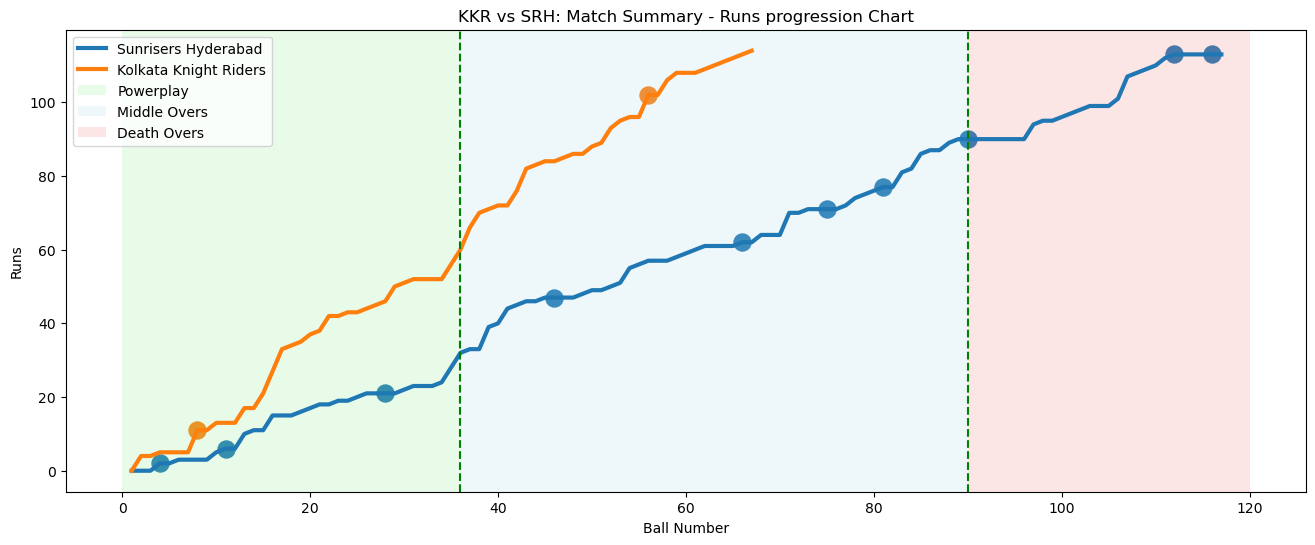

In [29]:
show_summary(df, 1426312)

In [27]:
plt.savefig("match_summary.png", dpi=300, bbox_inches='tight')

<Figure size 640x480 with 0 Axes>